타이타닉 데이터 EDA _ 한원배

titanic 데이터 설명

**columns 정보**
- pclass : 객실 등급
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home : 출신

# 타이타닉 탑승자 데이터 불러오기

In [ ]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 로딩 및 확인
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/프로젝트/타이타닉/titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
# 데이터 종류 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [ ]:
# 기초통계량 확인
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# 생존자/사망자 수 분석

## 생존자와 사망자 비율

*   survived 0 : 사망
*   survived 1 : 생존



0    809
1    500
Name: survived, dtype: int64

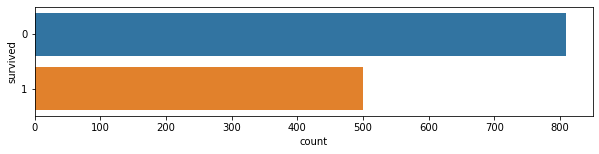

In [ ]:
fig = plt.figure(figsize = (10,2))
sns.countplot(y = 'survived', data=df) # 그래프
df.survived.value_counts() # df['survived'].value_counts()

## 클래스별 생존율

3    709
1    323
2    277
Name: pclass, dtype: int64


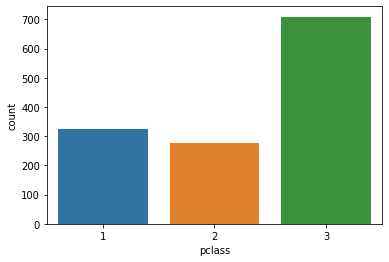

In [ ]:
# 클래스별 분포

print(df.pclass.value_counts())
sns.countplot(x="pclass", data=df)

3등급 승객이 클래스 중에서 최다 인원

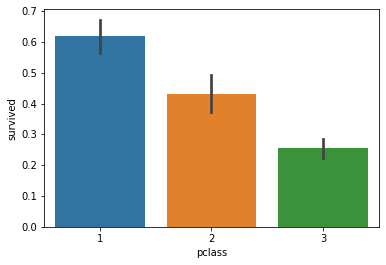

In [ ]:
sns.barplot(x='pclass', y='survived', data=df)

클래스가 높을수록(운임 비용을 더 지불할 수록) 생존율이 높아지는 경향을 보인다. 아래와 같이 그 이유에 대해 두 가지의 가설을 제시할 수 있으나, 현재 데이터로는 두 가설의 진위판정을 하기 힘듬.

1.   선박에서 클래스별로 객실의 위치가 정해지므로, 재난 당시에 객실 위치가 구조에 용이한 위치인지에 따른 생존율 차이
2.   구조 당시 차별에 의한 생존율 차이
 





## 각 클래스 안에서 남여의 생존율 비교

성별 분포 확인

male      843
female    466
Name: sex, dtype: int64

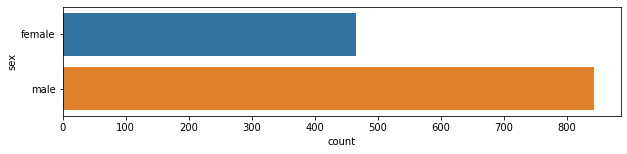

In [ ]:
fig = plt.figure(figsize = (10,2))
sns.countplot(y = 'sex', data=df)
df['sex'].value_counts()

남자의 수가 더 많음

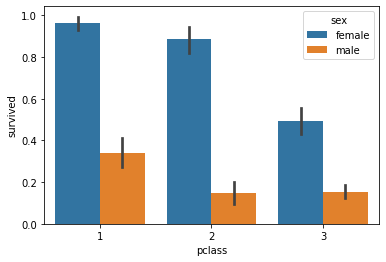

In [ ]:
sns.barplot(x='pclass', y='survived', hue='sex', data=df)

각각의 클래스 안에서도 여성이 남성에 비해 높은 생존율을 보이고 있다. 이는 구조 당시에 여성을 우선시 했다는 가설을 입증할 수 있는 자료가 된다.

In [ ]:
# cf) 남녀 생존율

how = {
    'survived': np.mean
}

df.groupby('sex').agg( how ) * 100

,survived
sex,
female,72.746781
male,19.098458


위 표도 압도적인 여성의 생존율을 보여준다. 위에 언급한 가설을 입증해주는 강력한 증거라고 볼 수 있다.

## 보트별 생존율 (결과: factor 제외)


In [ ]:
df['boat'].unique()

array(['2', '11', nan, '3', '10', 'D', '4', '9', '6', 'B', '8', 'A', '5',
       '7', 'C', '14', '5 9', '13', '1', '15', '5 7', '8 10', '12', '16',
       '13 15 B', 'C D', '15 16', '13 15'], dtype=object)

In [ ]:
df.groupby('boat').get_group('1')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
99,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1,NaN,London / Paris
100,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,1,NaN,London / Paris
117,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,1,NaN,NaN
256,1,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S,1,NaN,"New York, NY"
280,1,1,"Stengel, Mr. Charles Emil Henry",male,54.0,1,0,11778,55.4417,C116,C,1,NaN,"Newark, NJ"


In [ ]:
df.groupby('boat')['survived'].count()

boat
1           5
10         29
11         25
12         19
13         39
13 15       2
13 15 B     1
14         33
15         37
15 16       1
16         23
2          13
3          26
4          31
5          27
5 7         2
5 9         1
6          20
7          23
8          23
8 10        1
9          25
A          11
B           9
C          38
C D         2
D          20
Name: survived, dtype: int64

In [ ]:
df.groupby('boat').count()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
boat,,,,,,,,,,,,,
1,5,5,5,5,4,5,5,5,5,4,5,0,4
10,29,29,29,29,27,29,29,29,29,11,29,0,26
11,25,25,25,25,24,25,25,25,25,11,25,0,21
12,19,19,19,19,19,19,19,19,19,1,19,0,19
13,39,39,39,39,31,39,39,39,39,6,39,0,23
13 15,2,2,2,2,2,2,2,2,2,0,2,0,0
13 15 B,1,1,1,1,1,1,1,1,1,0,1,0,1
14,33,33,33,33,30,33,33,33,33,8,33,0,28
15,37,37,37,37,34,37,37,37,37,0,37,0,11


각 보트의 생존자수와 name의 수가 동일


*   생존자 중에서 생존한 사람들만 어떤 보트에 탔는지 기록됨
*   보트 안 생존자 수 factor는 무의미함


# 나이별 생존율

나이 분포 확인

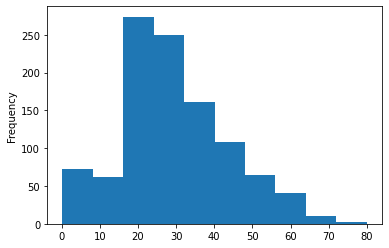

In [ ]:
df['age'].plot.hist()

In [ ]:
df['age'].unique()

array([29.  ,  0.92,  2.  , 30.  , 25.  , 48.  , 63.  , 39.  , 53.  ,
       71.  , 47.  , 18.  , 24.  , 26.  , 80.  ,   nan, 50.  , 32.  ,
       36.  , 37.  , 42.  , 19.  , 35.  , 28.  , 45.  , 40.  , 58.  ,
       22.  , 41.  , 44.  , 59.  , 60.  , 33.  , 17.  , 11.  , 14.  ,
       49.  , 76.  , 46.  , 27.  , 64.  , 55.  , 70.  , 38.  , 51.  ,
       31.  ,  4.  , 54.  , 23.  , 43.  , 52.  , 16.  , 32.5 , 21.  ,
       15.  , 65.  , 28.5 , 45.5 , 56.  , 13.  , 61.  , 34.  ,  6.  ,
       57.  , 62.  , 67.  ,  1.  , 12.  , 20.  ,  0.83,  8.  ,  0.67,
        7.  ,  3.  , 36.5 , 18.5 ,  5.  , 66.  ,  9.  ,  0.75, 70.5 ,
       22.5 ,  0.33,  0.17, 40.5 , 10.  , 23.5 , 34.5 , 20.5 , 30.5 ,
       55.5 , 38.5 , 14.5 , 24.5 , 60.5 , 74.  ,  0.42, 11.5 , 26.5 ])

In [ ]:
df['age'].nunique()

98

기준을 세워서 연령을 그룹핑 해보자

In [ ]:
df['age_range'] = ""

In [ ]:
# 노가다(?)스럽지만 개인적으로 구현하기 힘들었기 때문에 로직 기억해둘 것! -> 행 인덱스별로 채워줘야됨
# 조교님 조언 : age가 13 미만일 때 범위의 age_range만 변경해야하는데, age_range 컬럼의 전체가 변경됩니다.

for i in range(len(df)) :
  if df['age'][i] < 13 :
    df['age_range'][i] = 'children'
  elif df['age'][i] < 20 : 
    df['age_range'][i] = 'teenager'
  elif df['age'][i] < 40 :
    df['age_range'][i] = 'youth'
  elif df['age'][i] < 60 : 
    df['age_range'][i] = 'middle-aged'
  elif df['age'][i] >= 60 :
    df['age_range'][i] = 'old'
  else :
    df['age_range'][i] = 'None'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-pa

In [ ]:
# 참고코드

'''def chiv(x):
    if x <1.18 :
        return "저가"
    elif x < 3.6 :
        return "중가"
    else : 
        return "고가"
    
df['PER1'] = df['PER'].map(chiv)'''

연령대별 남녀 구성비 확인

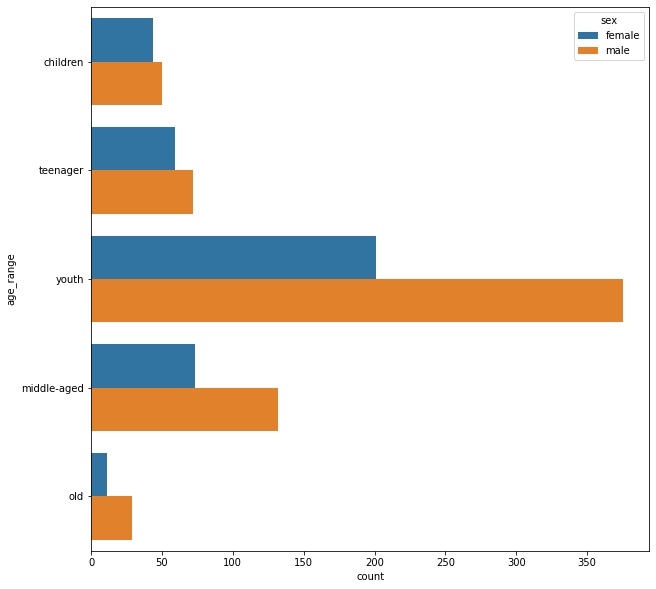

In [ ]:
fig = plt.figure(figsize = (10,10))
sns.countplot(y = 'age_range', hue = 'sex', data=df, order = ['children', 'teenager', 'youth', 'middle-aged', 'old']) # 결측치 자료 제외

'20세 이상부터 40세 미만 청년(youth) 남자들'이 승객 구성비 상에서 압도적인 위치를 차지하는 것을 볼 수 있다.

# 다변량 그래프 분석

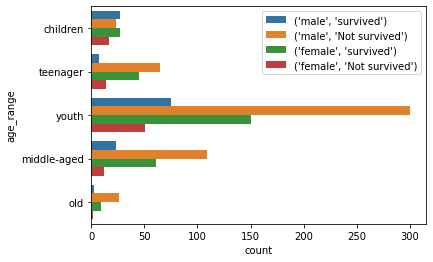

In [ ]:
sns.countplot(y = 'age_range', order = ['children', 'teenager', 'youth', 'middle-aged', 'old'], hue = df[['sex','survived_str']].apply(tuple, axis = 1), hue_order = [('male', 'survived'), ('male', 'Not survived'), ('female', 'survived'), ('female', 'Not survived')], data = df) 
# age 결측치 제외

# 결론
*   다변량 분석(연령대, 성별, 생존여부)을 해본 결과에 의하면 '20세 이상부터 40세 미만 청년(youth) 남성'의 희생이 큰 것을 볼 수 있다.


     1)   '연령대별 남녀 구성비 그래프'에서 보다시피 청년 남성이 승객 구성비 상으로 제일 큰 비중을 차지함
     2)   그럼에도 불구하고 희생자가 많음

*   즉, 청년 남성이 신체적으로 구조받기에 우수한 조건을 갖춤에도 불구하고 '사회적 합의'에 의해서 희생을 했을 가능성을 보여준다.
